In [26]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as opt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

In [31]:
x = torch.unsqueeze(torch.linspace(-3,3,100),1)
y = torch.sin(x) + torch.rand(100,1)

In [32]:
x.size(),y.size(),x.type()

(torch.Size([100, 1]), torch.Size([100, 1]), 'torch.FloatTensor')

In [33]:
plt.scatter(x.numpy(),y.numpy())

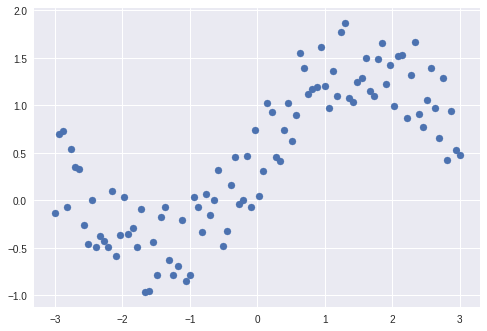

In [38]:
model1 = nn.Sequential(
    nn.Linear(1,10),
    nn.Linear(10,1),
    nn.Tanh()
)

In [39]:
opt1 = opt.SGD(model1.parameters(),lr=0.001)
loss = nn.MSELoss()
x = Variable(x)
y = Variable(y)

RuntimeError: Variable data has to be a tensor, but got Variable

In [42]:
for i in range(1000):
    yy = model1(x)
    l = loss(yy,y)
    opt1.zero_grad()
    l.backward()
    opt1.step()
    if i % 100 == 0:
        print(l)

yy = model1(x)
plt.plot(x.data.numpy(),yy.data.numpy())
        
    

Variable containing:
 0.3176
[torch.FloatTensor of size 1]

Variable containing:
 0.3027
[torch.FloatTensor of size 1]

Variable containing:
 0.2971
[torch.FloatTensor of size 1]

Variable containing:
 0.2946
[torch.FloatTensor of size 1]

Variable containing:
 0.2931
[torch.FloatTensor of size 1]

Variable containing:
 0.2923
[torch.FloatTensor of size 1]

Variable containing:
 0.2917
[torch.FloatTensor of size 1]

Variable containing:
 0.2913
[torch.FloatTensor of size 1]

Variable containing:
 0.2911
[torch.FloatTensor of size 1]

Variable containing:
 0.2909
[torch.FloatTensor of size 1]



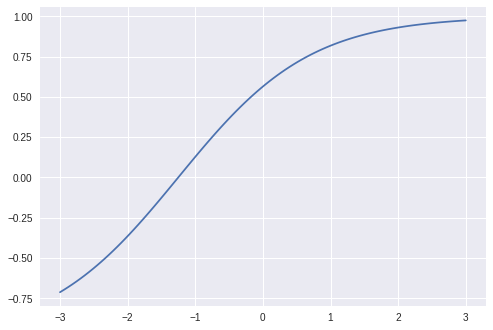

In [43]:
plt.show()

In [1]:
import sklearn

In [20]:
import sklearn
import sklearn.naive_bayes as nb

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
from sklearn.preprocessing import  OneHotEncoder

In [23]:
from sklearn.datasets import make_classification

In [24]:
x,y = make_classification()

In [27]:
import matplotlib.pyplot as plt
import numpy as np


In [28]:
np.unique(y)

array([0, 1])

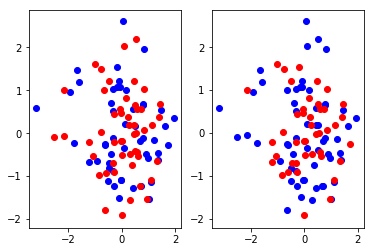

In [36]:
plt.subplot(121)
plt.scatter(x[y==0][:,0],x[y==0][:,1],c='b')
plt.scatter(x[y==1][:,0],x[y==1][:,1],c='r')
plt.subplot(122)
plt.scatter(x[y_==0][:,0],x[y_==0][:,1],c='b')
plt.scatter(x[y_==1][:,0],x[y_==1][:,1],c='r')
plt.show()

In [55]:
gbb = nb.BernoulliNB()

In [56]:
gbb.fit(x,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [49]:
y_ = gbb.predict(x)

In [58]:
from sklearn.cross_validation import KFold

In [59]:
from sklearn.model_selection import cross_val_score, learning_curve 

In [61]:
cross_val_score(gbb,x,y,cv=10)

array([ 1. ,  0.8,  1. ,  0.9,  0.6,  1. ,  0.6,  0.8,  0.8,  1. ])

In [74]:
_, train, test = learning_curve(gbb,x,y,train_sizes=np.linspace(0.001,1,50))

/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:837: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 49 instead of 50).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes

In [75]:
train, test

(array([[ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  0.92857143,  0.92857143],
        [ 0.9375    ,  0.9375    ,  0.9375    ],
        [ 0.94117647,  0.94117647,  0.94117647],
        [ 0.94444444,  1.        ,  1.        ],
        [ 0.95      ,  0.95      ,  0.95      ],
        [ 0.95238095,  0.95238095,  0.95238095],
        [ 0.95454545,  0.95454545,  0.95454545],
        [ 0.95833333,  0.91666667,  0.91666667],
        [ 0.96      ,  0.92      ,  0.92      ],
        [ 0.96153846,  0.96153846,  0.96153846],
        [ 0.85714286

In [76]:
train_score = np.sum(train,axis = 1)/3
test_score = np.sum(test,axis = 1)/3

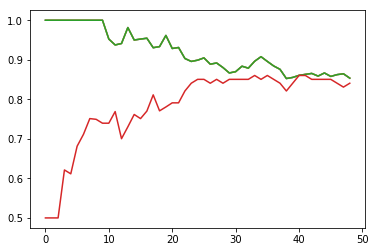

In [80]:
plt.plot(range(train_score.shape[0]),train_score,range(train_score.shape[0]),test_score)
plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV as gscv

In [84]:
gscv_search = gscv(gbb,param_grid={'alpha':[0.1,0.5,1.0], 'binarize':[0.0,1]},n_jobs=4)

In [85]:
gscv_search.fit(x,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'alpha': [0.1, 0.5, 1.0], 'binarize': [0.0, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [87]:
gscv_search.best_params_

{'alpha': 0.1, 'binarize': 0.0}

In [88]:
best = gscv_search.best_estimator_

In [89]:
_, best_train, best_test = learning_curve(best,x,y,train_sizes=np.linspace(0.001,1,50))

/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:837: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 49 instead of 50).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/home/yannick/anaconda2/envs/tensorflow/lib/python3.6/site-packages/sklearn/naive_bayes

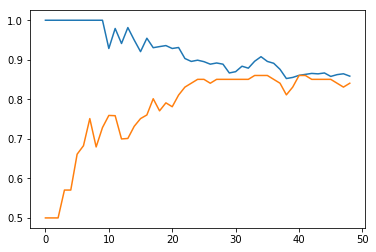

In [90]:
train_score = np.sum(best_train,axis = 1)/3
test_score = np.sum(best_test,axis = 1)/3
plt.plot(range(train_score.shape[0]),train_score,range(train_score.shape[0]),test_score)
plt.show()

In [91]:
gscv_search.best_score_

0.83999999999999997